In [8]:
from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.connection_elements.Layer import Layer


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


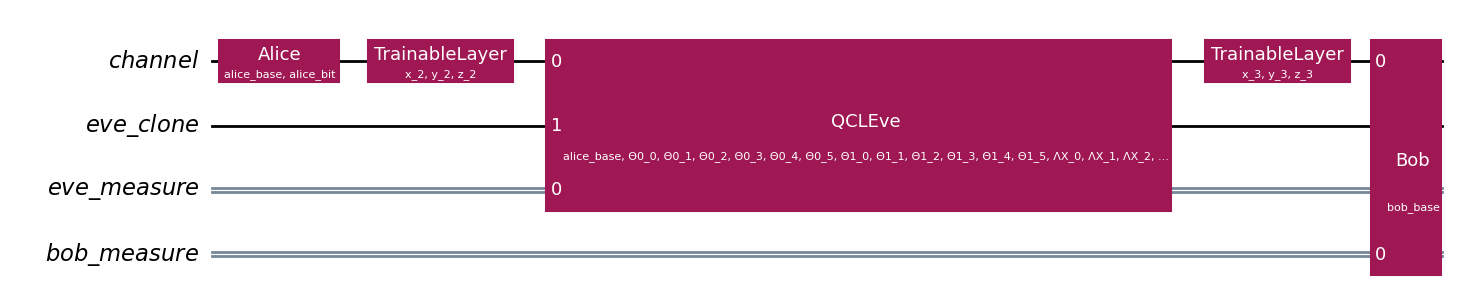

In [9]:
from protocol.connection_elements.QCLEve import QCLEve

layers = [Layer(), Layer()]
eve = QCLEve()

protocol = BB84EveTrainableProtocol(n_bits=128, elements=[layers[0],eve,layers[1]], f_value=0.9, alpha=25,
                                        seed=0, learning_rate=0.1, batch_size=128)

qc, _ = protocol.qc_with_ctx()
qc.draw("mpl")

In [24]:
def train():
    bob_qber, eve_qber = [], []
    for epoch in range(50):
        loss = protocol.train()
        print(epoch, loss)
        # print(protocol.get_all_parameters())
        # qber = protocol.run()
        # bob_qber.append(qber['bob_qber'])
        # eve_qber.append(qber['eve_qber'])
        # if epoch % 5 == 0:
        #     print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')

    return bob_qber, eve_qber

In [11]:
protocol.f_value = 0.9
b_q, e_q = train()

epoch: 0, loss: 3.0185952186584473, QBER: {'bob_qber': np.float64(0.5272727272727273), 'eve_qber': np.float64(0.4545454545454546)}
epoch: 5, loss: 0.2731401026248932, QBER: {'bob_qber': np.float64(0.36363636363636365), 'eve_qber': np.float64(0.19999999999999996)}
epoch: 10, loss: -0.378099262714386, QBER: {'bob_qber': np.float64(0.49090909090909096), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 15, loss: -0.5847108364105225, QBER: {'bob_qber': np.float64(0.49090909090909096), 'eve_qber': np.float64(0.10909090909090913)}
epoch: 20, loss: -0.5252065658569336, QBER: {'bob_qber': np.float64(0.4181818181818182), 'eve_qber': np.float64(0.09090909090909094)}
epoch: 25, loss: -0.6359504461288452, QBER: {'bob_qber': np.float64(0.32727272727272727), 'eve_qber': np.float64(0.10909090909090913)}
epoch: 30, loss: -0.6723141074180603, QBER: {'bob_qber': np.float64(0.2909090909090909), 'eve_qber': np.float64(0.07272727272727275)}
epoch: 35, loss: -0.7632231116294861, QBER: {'bob_qber': np.floa

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

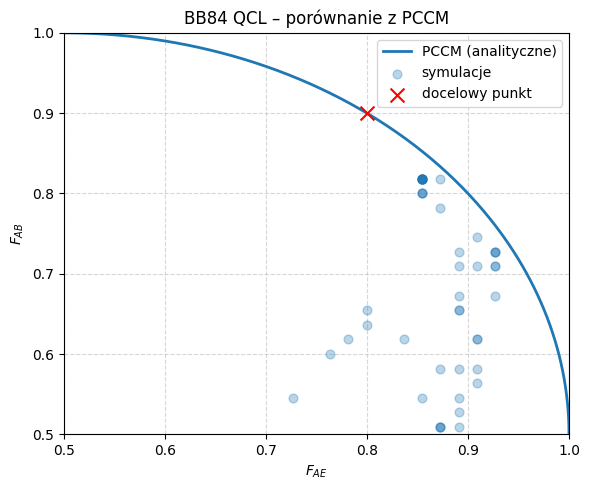

In [12]:
plt_fab_fae(b_q, e_q, 0.9)

In [13]:
protocol.freeze_elements(layers)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [14]:
b_q, e_q = train()

epoch: 0, loss: -0.7169421315193176, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 5, loss: -0.9070248007774353, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 10, loss: -0.5962810516357422, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 15, loss: -0.8904958367347717, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 20, loss: -0.7169421315193176, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 25, loss: -0.7351239323616028, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 30, loss: -0.8888429403305054, QBER: {'bob_qber': np.float64(0.18181818181818177), 'eve_qber': np.float64(0.12727272727272732)}
epoch: 35, loss: -0.835950493812561, QBER: {'bob_qber': n

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

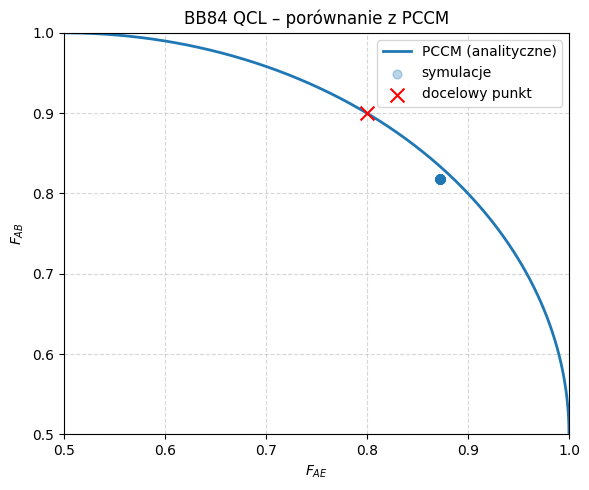

In [15]:
plt_fab_fae(b_q, e_q, 0.9)

In [16]:
protocol.freeze_elements([eve])

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [ ]:
protocol.alpha = 1000
protocol.f_value = 1
b_q, e_q = train()

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

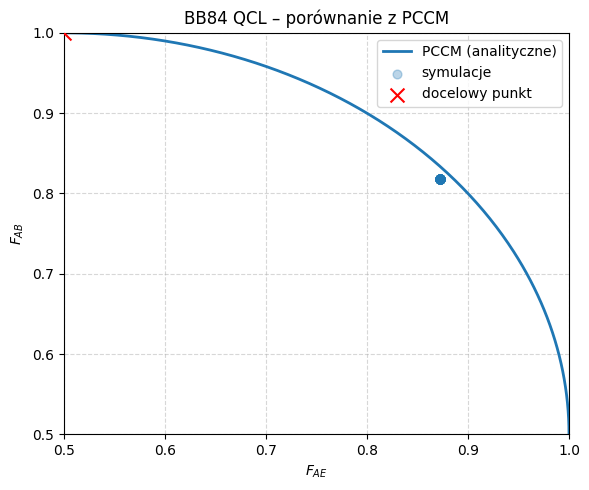

In [18]:
plt_fab_fae(b_q, e_q, 1)